<a href="https://colab.research.google.com/github/Thiraput01/Dig_img/blob/main/10_Image_Processing_Part_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://drive.google.com/uc?id=1dhh4m9VRLUSmbaHfge2iRSW5Azkpefco  -O kitty3.png
!wget https://drive.google.com/uc?id=1o0UMPTyUFzX9CaQp-BwYXgkCho1Zo6yL  -O kitty55.png
!wget https://drive.google.com/uc?id=1Jk0cEtQt4HxkLcKlmTHukpb22gJZ4dmL -O noisy_kitty55.png
!wget https://drive.google.com/uc?id=1xCNA5338nzj1GgGQ5-oBA1dKCW1Mvn21 -O hillbefore_noise10%.jpg


--2024-10-22 01:05:25--  https://drive.google.com/uc?id=1dhh4m9VRLUSmbaHfge2iRSW5Azkpefco
Resolving drive.google.com (drive.google.com)... 74.125.137.102, 74.125.137.100, 74.125.137.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.137.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1dhh4m9VRLUSmbaHfge2iRSW5Azkpefco [following]
--2024-10-22 01:05:25--  https://drive.usercontent.google.com/download?id=1dhh4m9VRLUSmbaHfge2iRSW5Azkpefco
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.101.132, 2607:f8b0:4023:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.101.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1194851 (1.1M) [image/png]
Saving to: ‘kitty3.png’

kitty3.png          100%[===================>]   1.14M  --.-KB/s    in 0.1s    

2024-10-22 01:05:27 (8.77 MB/s) - ‘kitty3.png’ s

In [ ]:
import cv2
img = cv2.imread('kitty3.png')
print(img.shape)
img = cv2.imread('kitty55.png')
print(img.shape)
img = cv2.imread('noisy_kitty55.png')
print(img.shape)


(1000, 1000, 3)
(500, 500, 3)
(500, 500, 3)


# L10 Object Recognition Part I

In [ ]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
import cv2
import numpy as np

## Histogram of Oriented Gradient (HOG)

* simple image

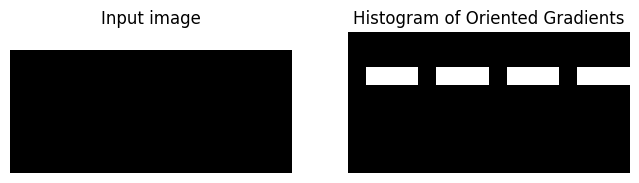

In [ ]:
image = np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
                  ,[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
                  ,[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
                  ,[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
                  ,[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

fd, hog_image = hog(image, orientations=5, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [ ]:
print(fd.shape)
print(fd)

(60,)
[0.         0.         0.70710678 0.         0.         0.
 0.         0.70710678 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.70710678 0.
 0.         0.         0.         0.70710678 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.70710678 0.         0.         0.         0.         0.70710678
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


* Astronaut image

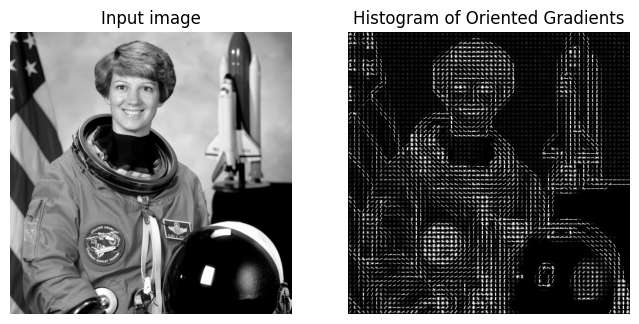

In [ ]:
image = data.astronaut()
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)


# TO DO : Select different orientaion, pixels_per_cell and cells_per_block and analyze the results
fd, hog_image = hog(image, orientations=9, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=True)
fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [ ]:
import numpy as np

print(-np.log(0.9))
print(-np.log(0.1))

0.10536051565782628
2.3025850929940455


In [ ]:
print((5*5*3 +1)*6)
print((7*7*32+1)*10)

456
15690


## HOG + Neural Networks

* MNIST dataset

In [ ]:
import numpy as np
from skimage.feature import hog
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from keras.datasets import mnist


np.random.seed(0) # for reproducibility

# 1) Load Dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 2) (Optional) Data Normalization to [0,1]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 # 0 - 1
X_test /= 255


# 3) Feature Extraction
list_hog = []
for feature in X_train:
  fd = hog(feature, orientations=9, pixels_per_cell=(14,14),cells_per_block=(1,1))
  list_hog.append(fd)

hog_features_train = np.array(list_hog, 'float64')


# Feature Normalization
preProcess = preprocessing.MaxAbsScaler().fit(hog_features_train)
hog_features_transformed_train = preProcess.transform(hog_features_train)

# 4) Training classification model
model_hog_mlp = MLPClassifier(activation='relu', hidden_layer_sizes=(100, 100), verbose=1,max_iter=20)
model_hog_mlp.fit(hog_features_transformed_train, y_train)
print("Training accuracy :: {}\n".format(model_hog_mlp.score(hog_features_transformed_train, y_train)))


# 5) Use the model for prediction (Evaluation on testing data)
list_hog_test = []
for feature in X_test:
  fd = hog(feature, orientations=9, pixels_per_cell=(14,14),cells_per_block=(1,1) )
  list_hog_test.append(fd)
hog_features_test = np.array(list_hog_test, 'float64')

hog_features_transformed_test = preProcess.transform(hog_features_test)

print("Testing Score :: {}\n".format(model_hog_mlp.score(hog_features_transformed_test, y_test)))



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Iteration 1, loss = 0.92706363
Iteration 2, loss = 0.48813762
Iteration 3, loss = 0.43359609
Iteration 4, loss = 0.40329528
Iteration 5, loss = 0.38757099
Iteration 6, loss = 0.37202271
Iteration 7, loss = 0.36140080
Iteration 8, loss = 0.35258350
Iteration 9, loss = 0.34411345
Iteration 10, loss = 0.33684064
Iteration 11, loss = 0.33101779
Iteration 12, loss = 0.32496898
Iteration 13, loss = 0.31959474
Iteration 14, loss = 0.31340650
Iteration 15, loss = 0.31045845
Iteration 16, loss = 0.30594155
Iteration 17, loss = 0.30274313
Iteration 18, loss = 0.29878464
Iteration 19, loss = 0.29671760
Iteration 20, loss = 0.29251025
Training accuracy :: 0.9040833333333333



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Testing Score :: 0.9052



* Inferencing

[9]


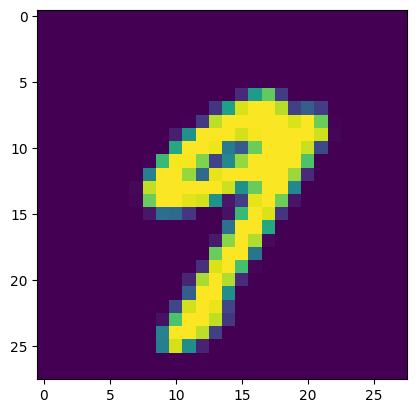

In [ ]:
fd_test = hog(X_test[20].reshape((28,28)), orientations=9, pixels_per_cell=(14,14),cells_per_block=(1,1))
hog_features_transformed_test = preProcess.transform(fd_test.reshape((1,hog_features_test.shape[1])))
print(model_hog_mlp.predict(hog_features_transformed_test))

plt.imshow(X_test[20])
plt.show()

## Convolutional Neural Networks (CNN)

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader, random_split
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchsummary import summary

### Prep data

In [ ]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True,
)
test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor()
)

train_data, val_data = random_split(train_data,[50000,10000])


batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(train_data, batch_size=batch_size)
val_dataloader = DataLoader(val_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in train_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

for X, y in val_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break



Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64
Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64
Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


### Prep model

In [ ]:
# Creating Models
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=16,
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)
        self.dropout = nn.Dropout(0.1)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)

        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        output = F.log_softmax(self.out(x), dim=1)
        # output = self.out(x)
        return output




model = Net().to(device)
print(model)

summary(model, input_size=(1, 28, 28))

# Optimizing the Model Parameters
loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)




Using cuda device
Net(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             416
              ReLU-2           [-1, 16, 28, 28]               0
         MaxPool2d-3           [-1, 16, 14, 14]               0
            Conv2d-4           [-1, 32, 14, 14]          12,832
              ReLU-5           [-1, 32, 14, 14]               0
         MaxPool2d

### Training

Epoch 1
-------------------------------
loss: 2.304808  [    0/50000]
loss: 0.127829  [ 6400/50000]
loss: 0.196468  [12800/50000]
loss: 0.053843  [19200/50000]
loss: 0.029575  [25600/50000]
loss: 0.081211  [32000/50000]
loss: 0.176520  [38400/50000]
loss: 0.063540  [44800/50000]
Val Accuracy: 97.1%,  Avg loss: 0.092198 

Epoch 2
-------------------------------
loss: 0.157042  [    0/50000]
loss: 0.055441  [ 6400/50000]
loss: 0.164455  [12800/50000]
loss: 0.073184  [19200/50000]
loss: 0.021514  [25600/50000]
loss: 0.061574  [32000/50000]
loss: 0.086253  [38400/50000]
loss: 0.075192  [44800/50000]
Val Accuracy: 97.4%,  Avg loss: 0.086017 

Epoch 3
-------------------------------
loss: 0.133869  [    0/50000]
loss: 0.084292  [ 6400/50000]
loss: 0.079342  [12800/50000]
loss: 0.136208  [19200/50000]
loss: 0.043876  [25600/50000]
loss: 0.161683  [32000/50000]
loss: 0.070413  [38400/50000]
loss: 0.136974  [44800/50000]
Val Accuracy: 97.6%,  Avg loss: 0.083298 

Epoch 4
-----------------------

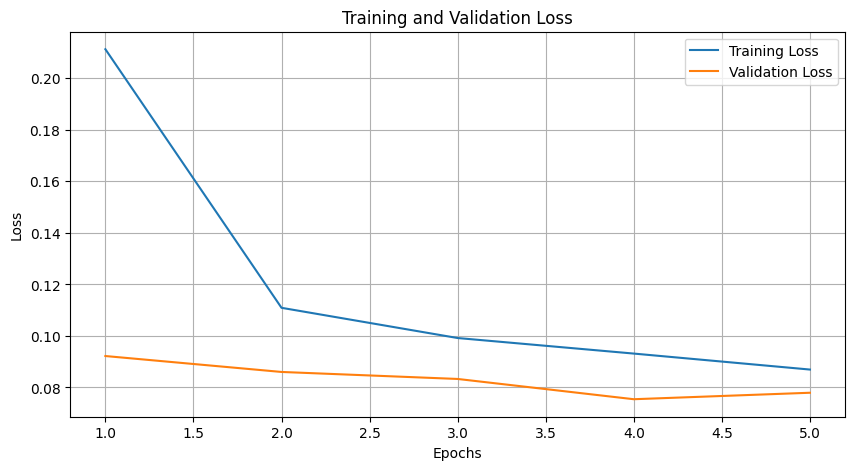

In [ ]:
train_losses = []
val_losses = []

# # reset parameters
# for param in model.parameters():
#     param.requires_grad = True
#     param.grad = None
#     param.data.zero_()

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    total_loss = 0  # To accumulate the loss
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()  # Accumulate loss

        if batch % 100 == 0:
            current = batch * len(X)
            print(f"loss: {loss.item():>7f}  [{current:>5d}/{size:>5d}]")

    # Average loss for the epoch
    avg_loss = total_loss / len(dataloader)
    train_losses.append(avg_loss)  # Store the average loss

def val(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    total_loss = 0  # To accumulate the loss
    correct = 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            loss = loss_fn(pred, y)
            total_loss += loss.item()  # Accumulate loss
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    avg_loss = total_loss / num_batches  # Average loss for the validation set
    val_losses.append(avg_loss)  # Store the average validation loss
    correct /= size
    print(f"Val Accuracy: {(100 * correct):>0.1f}%,  Avg loss: {avg_loss:>8f} \n")

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Accuracy: {(100*correct):>0.1f}%,  Avg loss: {test_loss:>8f} \n")


# Main training loop
epochs = 5
for t in range(epochs):
    print(f"Epoch {t + 1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    val(val_dataloader, model, loss_fn)

print("Done!")

# Step 2: Plot the Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


### Inferencing

In [ ]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

_model = Net().to(device)
weights=torch.load("model.pth")
_model.load_state_dict(weights)

print("Test accuracy")
test(test_dataloader, _model, loss_fn)



Saved PyTorch Model State to model.pth
Test accuracy


<ipython-input-35-8fd01d503daa>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights=torch.load("model.pth")


Test Accuracy: 98.2%,  Avg loss: 0.060642 

